In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
#import gc

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
df=pd.read_csv('creditcard.csv')

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
total=df.isnull().sum()

In [11]:
total

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
#no missing data

In [13]:
tmp=df['Class'].value_counts()
tmp

0    284315
1       492
Name: Class, dtype: int64

In [14]:
#highly imbalence data

In [15]:
tmp.index

Int64Index([0, 1], dtype='int64')

In [16]:
tmp.values

array([284315,    492])

In [17]:
d=pd.DataFrame({'Class':tmp.index,'values':tmp.values})

In [18]:
d

,Class,values
0,0,284315
1,1,492


In [19]:
trace = go.Bar(
    x = d['Class'],y = d['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=d['values']
)

In [20]:
data = [trace]

In [21]:
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )

In [22]:
fig = dict(data=data, layout=layout)

In [23]:
iplot(fig, filename='class')

In [24]:
class_0=df.loc[df['Class']==0]['Time']
class_1=df.loc[df['Class']==1]['Time']

In [25]:
hist_data=[class_0,class_1]

In [26]:
group_labels = ['Not Fraud', 'Fraud']

In [27]:
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)

In [28]:
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))

Layout({
    'barmode': 'overlay',
    'hovermode': 'closest',
    'legend': {'traceorder': 'reversed'},
    'template': '...',
    'title': {'text': 'Credit Card Transactions Time Density Plot'},
    'xaxis': {'anchor': 'y2', 'domain': [0.0, 1.0], 'title': {'text': 'Time [s]'}, 'zeroline': False},
    'yaxis': {'anchor': 'free', 'domain': [0.0, 1], 'position': 0.0}
})

In [29]:
iplot(fig, filename='dist_only')

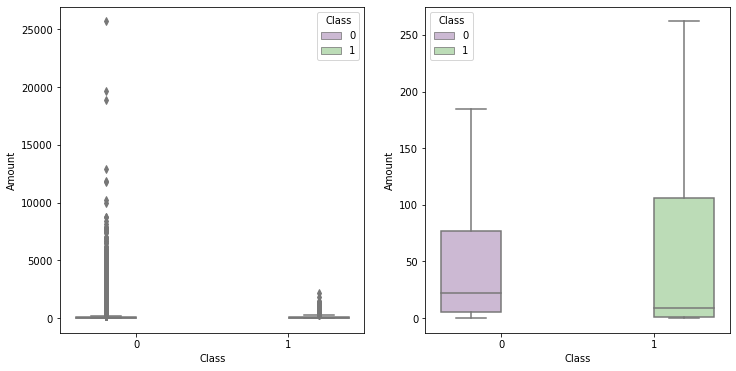

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)


In [31]:
tmp = df[['Amount','Class']].copy()

In [32]:
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

In [33]:
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [34]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [35]:
fraud = df.loc[df['Class'] == 1]
trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

<AxesSubplot:title={'center':'Credit Card Transactions features correlation plot (Pearson)'}>

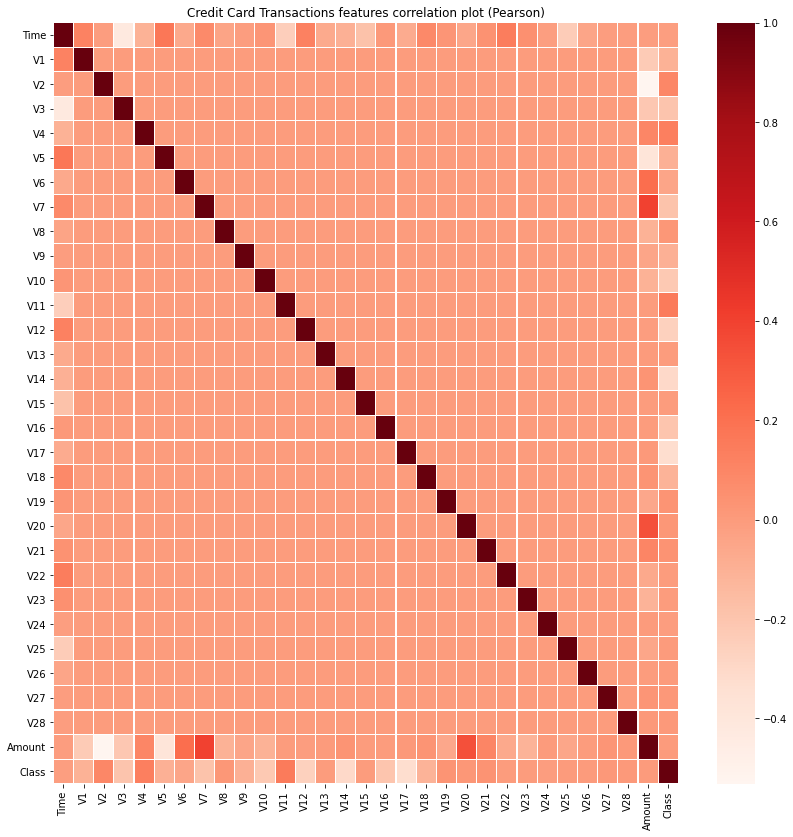

In [36]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")

In [39]:
train_df, test_df = train_test_split(df, test_size=.2, random_state=2000, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=.2, random_state=2000, shuffle=True )

In [40]:
rfc = RandomForestClassifier(n_jobs=4, 
                             random_state=2000,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [41]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [42]:
rfc.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2000, verbose=False)

[Text(0, 0, 'V17'),
 Text(1, 0, 'V12'),
 Text(2, 0, 'V14'),
 Text(3, 0, 'V11'),
 Text(4, 0, 'V10'),
 Text(5, 0, 'V16'),
 Text(6, 0, 'V18'),
 Text(7, 0, 'V9'),
 Text(8, 0, 'V4'),
 Text(9, 0, 'V7'),
 Text(10, 0, 'V26'),
 Text(11, 0, 'V3'),
 Text(12, 0, 'V1'),
 Text(13, 0, 'V20'),
 Text(14, 0, 'V2'),
 Text(15, 0, 'V21'),
 Text(16, 0, 'V5'),
 Text(17, 0, 'V19'),
 Text(18, 0, 'V6'),
 Text(19, 0, 'V27'),
 Text(20, 0, 'V28'),
 Text(21, 0, 'V15'),
 Text(22, 0, 'V8'),
 Text(23, 0, 'Time'),
 Text(24, 0, 'V13'),
 Text(25, 0, 'Amount'),
 Text(26, 0, 'V24'),
 Text(27, 0, 'V25'),
 Text(28, 0, 'V22'),
 Text(29, 0, 'V23')]

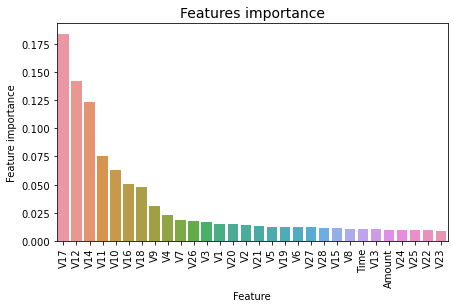

In [43]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)

In [44]:
preds = rfc.predict(valid_df[predictors])

Text(0.5, 1.0, 'Confusion Matrix')

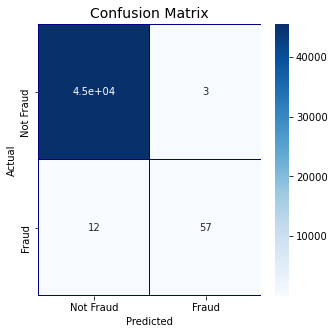

In [45]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)